In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection  import train_test_split

In [4]:
# read the insurance data set
df=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# chekc if the data has null value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*  unique() is function allow us to see the type of our input

In [8]:
df.sex.unique()
#df.children.unique()
#df.smoker.unique()

array(['yes', 'no'], dtype=object)

* we should apply one hard encoding--- turn non-numerical value to  numerical value

In [10]:
df_one_hot=pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


* create x and y

In [17]:
X=df_one_hot.drop("charges",axis=1)
Y=df_one_hot["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [18]:
# see X and Y
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [19]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X),len(Y),len(X_train),len(X_test)

(1338, 1338, 1070, 268)

In [34]:
# create a model neural network:
tf.random.set_seed(42)
# create the model:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile the model:
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])
# fitten the model
model.fit(X_train,Y_train, epochs=100)


Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 615us/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 585us/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 617us/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 575us/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 566us/step - loss: 7748.3887 - mae: 7748.388

34/34 [==============================] - 0s 505us/step - loss: 7283.4888 - mae: 7283.4888
Epoch 74/100
34/34 [==============================] - 0s 517us/step - loss: 7335.5088 - mae: 7335.5088
Epoch 75/100
34/34 [==============================] - 0s 556us/step - loss: 7275.6411 - mae: 7275.6411
Epoch 76/100
34/34 [==============================] - 0s 510us/step - loss: 7313.1860 - mae: 7313.1860
Epoch 77/100
34/34 [==============================] - 0s 517us/step - loss: 7485.7588 - mae: 7485.7588
Epoch 78/100
34/34 [==============================] - 0s 542us/step - loss: 7352.2803 - mae: 7352.2803
Epoch 79/100
34/34 [==============================] - 0s 456us/step - loss: 7520.5713 - mae: 7520.5713
Epoch 80/100
34/34 [==============================] - 0s 529us/step - loss: 7279.3779 - mae: 7279.3779
Epoch 81/100
34/34 [==============================] - 0s 520us/step - loss: 7273.8477 - mae: 7273.8477
Epoch 82/100
34/34 [==============================] - 0s 526us/step - loss: 7176.5210 

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [36]:
# check the result of insurance model on test data
model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 916us/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

#### to try improving our model : run to experiment 
* add extar layer with more hidden unit use adam optimizer
* train forlanger

In [53]:
tf.random.set_seed(42)
# create a model
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile the model
model_1.compile(loss=tf.keras.losses.mae,
             #optimizer=tf.keras.optimizers.SGD(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

# fiiting the model
model_1.fit(X_train,Y_train,epochs=100,verbose=1)


Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 791us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 654us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 700us/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 687us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 677us/step - loss: 10905.8154 - mae:

34/34 [==============================] - 0s 706us/step - loss: 6059.4883 - mae: 6059.4883
Epoch 74/100
34/34 [==============================] - 0s 639us/step - loss: 6031.3848 - mae: 6031.3848
Epoch 75/100
34/34 [==============================] - 0s 631us/step - loss: 6010.3350 - mae: 6010.3350
Epoch 76/100
34/34 [==============================] - 0s 583us/step - loss: 5995.2178 - mae: 5995.2178
Epoch 77/100
34/34 [==============================] - 0s 626us/step - loss: 5963.0718 - mae: 5963.0718
Epoch 78/100
34/34 [==============================] - 0s 672us/step - loss: 5940.0610 - mae: 5940.0610
Epoch 79/100
34/34 [==============================] - 0s 603us/step - loss: 5915.1064 - mae: 5915.1064
Epoch 80/100
34/34 [==============================] - 0s 648us/step - loss: 5887.9990 - mae: 5887.9990
Epoch 81/100
34/34 [==============================] - 0s 641us/step - loss: 5861.6992 - mae: 5861.6992
Epoch 82/100
34/34 [==============================] - 0s 693us/step - loss: 5834.3071 

In [54]:
model_1.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 951us/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [55]:
model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 992us/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [83]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
 
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)   
])
# compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#fitting the model:
history=model_3.fit(X_train,Y_train,epochs=300,verbose=2)


Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 - 0s - loss: 13273.1602 - mae: 13273.1602
Epoch 2/300
34/34 - 0s - loss: 13104.4297 - mae: 13104.4297
Epoch 3/300
34/34 - 0s - loss: 12749.5420 - mae: 12749.5420
Epoch 4/300
34/34 - 0s - loss: 12055.7500 - mae: 12055.7500
Epoch 5/300
34/34 - 0s - loss: 10905.8154 - mae: 10905.8154
Epoch 6/300
34/34 - 0s - loss: 9457.7217 - mae: 9457.7217
Epoch 7/300
34/34 - 0s - loss: 8147.6543 - mae: 8147.6543
Epoch 8/300
34/34 - 0s - loss: 7528.8413 - mae: 7528.8413
Epoch 9/300
34/34 - 0s - loss: 742

Epoch 128/300
34/34 - 0s - loss: 3791.7202 - mae: 3791.7202
Epoch 129/300
34/34 - 0s - loss: 3802.8027 - mae: 3802.8027
Epoch 130/300
34/34 - 0s - loss: 3789.7979 - mae: 3789.7979
Epoch 131/300
34/34 - 0s - loss: 3781.4004 - mae: 3781.4004
Epoch 132/300
34/34 - 0s - loss: 3774.9453 - mae: 3774.9453
Epoch 133/300
34/34 - 0s - loss: 3770.7568 - mae: 3770.7568
Epoch 134/300
34/34 - 0s - loss: 3769.5461 - mae: 3769.5461
Epoch 135/300
34/34 - 0s - loss: 3767.2349 - mae: 3767.2349
Epoch 136/300
34/34 - 0s - loss: 3766.0598 - mae: 3766.0598
Epoch 137/300
34/34 - 0s - loss: 3775.8564 - mae: 3775.8564
Epoch 138/300
34/34 - 0s - loss: 3783.4241 - mae: 3783.4241
Epoch 139/300
34/34 - 0s - loss: 3761.3586 - mae: 3761.3586
Epoch 140/300
34/34 - 0s - loss: 3762.6267 - mae: 3762.6267
Epoch 141/300
34/34 - 0s - loss: 3763.7026 - mae: 3763.7026
Epoch 142/300
34/34 - 0s - loss: 3765.6416 - mae: 3765.6416
Epoch 143/300
34/34 - 0s - loss: 3755.0134 - mae: 3755.0134
Epoch 144/300
34/34 - 0s - loss: 3750.57

Epoch 265/300
34/34 - 0s - loss: 3558.4526 - mae: 3558.4526
Epoch 266/300
34/34 - 0s - loss: 3559.4216 - mae: 3559.4216
Epoch 267/300
34/34 - 0s - loss: 3559.4324 - mae: 3559.4324
Epoch 268/300
34/34 - 0s - loss: 3550.5686 - mae: 3550.5686
Epoch 269/300
34/34 - 0s - loss: 3557.0735 - mae: 3557.0735
Epoch 270/300
34/34 - 0s - loss: 3545.2886 - mae: 3545.2886
Epoch 271/300
34/34 - 0s - loss: 3546.8140 - mae: 3546.8140
Epoch 272/300
34/34 - 0s - loss: 3543.7268 - mae: 3543.7268
Epoch 273/300
34/34 - 0s - loss: 3543.1992 - mae: 3543.1992
Epoch 274/300
34/34 - 0s - loss: 3541.0999 - mae: 3541.0999
Epoch 275/300
34/34 - 0s - loss: 3537.6238 - mae: 3537.6238
Epoch 276/300
34/34 - 0s - loss: 3541.2419 - mae: 3541.2419
Epoch 277/300
34/34 - 0s - loss: 3538.3347 - mae: 3538.3347
Epoch 278/300
34/34 - 0s - loss: 3538.9609 - mae: 3538.9609
Epoch 279/300
34/34 - 0s - loss: 3542.1421 - mae: 3542.1421
Epoch 280/300
34/34 - 0s - loss: 3532.5127 - mae: 3532.5127
Epoch 281/300
34/34 - 0s - loss: 3534.07

In [72]:
model_3.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 805us/step - loss: 3215.7161 - mae: 3215.7161


[3215.716064453125, 3215.716064453125]

<AxesSubplot:>

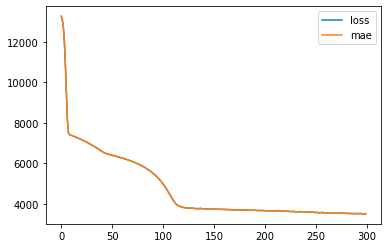

In [84]:
#plot history
pd.DataFrame(history.history).plot()

## Question: how long should i train for?
* it depends... it's depends on the model you are working on
* howeever tensorflow has a solution called earlystopping
*early stopping is a compoent we should add to our model , to stop training when there is no improvement


##  Normalisation and standarization
* to get data ready there some  steps that we should folow
    1. turn all data into number
    2. make sure all of your tensors are the right shape
    3. scale features(normalize, or stamdarize, neural network tend to prefer normalization) 

* what is normalization? is a technique often applied as a part of data preparation the goal of normalization is to change the values of numeric columns in the dataset to a commom scale without storing diffrent in in the ranges of values.
* age and bmi have diffrent scale


<AxesSubplot:ylabel='Frequency'>

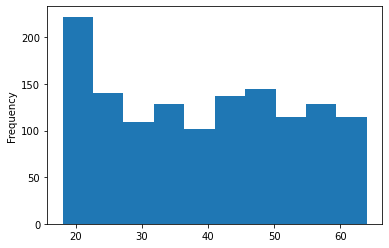

In [88]:

X["age"].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

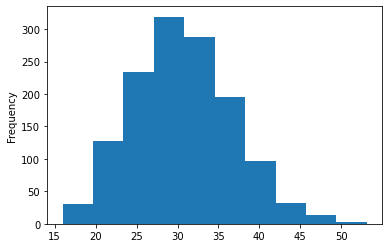

In [89]:
X['bmi'].plot(kind='hist')

#### In terms of Scaling values , neural networks tends to prefer normalization
* in case when we are not sure we can try both and see


In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [190]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [192]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [193]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [194]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [195]:
# noe we are making data preprocessing ,  the only think that we should do is training the model

In [200]:
tf.random.set_seed(42)

#create the model
model_processing=tf.keras.Sequential([
    tf.keras.layers.Dense(100) ,
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

model_processing.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)
#fiting the model

model_processing.fit(X_train_normal,Y_train,epochs=100,verbose=1)


Epoch 1/100
34/34 [==============================] - 0s 849us/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 710us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 683us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 709us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 683us/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 739us/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 761us/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 740us/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 750us/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 758us/s

34/34 [==============================] - 0s 674us/step - loss: 3682.8350 - mae: 3682.8350
Epoch 81/100
34/34 [==============================] - 0s 689us/step - loss: 3676.9768 - mae: 3676.9768
Epoch 82/100
34/34 [==============================] - 0s 779us/step - loss: 3673.9492 - mae: 3673.9492
Epoch 83/100
34/34 [==============================] - 0s 626us/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/100
34/34 [==============================] - 0s 685us/step - loss: 3664.5757 - mae: 3664.5757
Epoch 85/100
34/34 [==============================] - 0s 622us/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/100
34/34 [==============================] - 0s 715us/step - loss: 3660.3049 - mae: 3660.3049
Epoch 87/100
34/34 [==============================] - 0s 617us/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/100
34/34 [==============================] - 0s 646us/step - loss: 3655.2202 - mae: 3655.2202
Epoch 89/100
34/34 [==============================] - 0s 613us/step - loss: 3653.8831 

In [201]:
model_processing.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 951us/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
# normalization deos not garantie the model performance but it's something worth to try